In [ ]:
 from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.regularizers import l2
from keras.layers import Dropout

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from keras import regularizers
from collections import Counter

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#print(x_train[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train_n = x_train.astype('float32')
x_test_n = x_test.astype('float32')
x_train_norm = x_train_n / 255.0
x_test_norm = x_test_n / 255.0

# **Best Accuracy Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/50
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4957 - accuracy: 0.8245 - val_loss: 0.3515 - val_accuracy: 0.8751
Epoch 2/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3705 - accuracy: 0.8688 - val_loss: 0.3184 - val_accuracy: 0.8846
Epoch 3/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3360 - accuracy: 0.8795 - val_loss: 0.3009 - val_accuracy: 0.8904
Epoch 4/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3150 - accuracy: 0.8875 - val_loss: 0.2901 - val_accuracy: 0.8962
Epoch 5/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2988 - accuracy: 0.8920 - val_loss: 0.2833 - val_accuracy: 0.8992
Epoch 6/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2866 - accuracy: 0.8978 - val_loss: 0.2830 - val_accuracy: 0.8992
Epoch 7/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2769 - accuracy: 0.8998 - val_loss: 0.2662 -

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 92.10000038146973


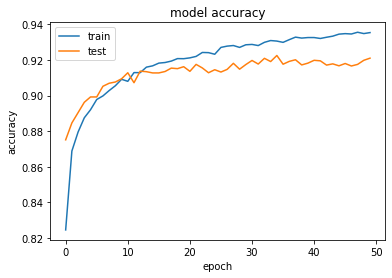

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

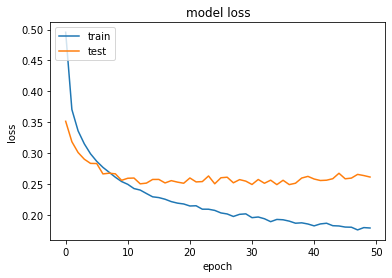

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Tuning Hyperparameters**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.2)) #change dropout to 0.2
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 22s 6ms/step - loss: 0.4715 - accuracy: 0.8339 - val_loss: 0.3350 - val_accuracy: 0.8798
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3372 - accuracy: 0.8817 - val_loss: 0.2975 - val_accuracy: 0.8926
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3020 - accuracy: 0.8939 - val_loss: 0.2795 - val_accuracy: 0.8974
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2784 - accuracy: 0.9011 - val_loss: 0.2778 - val_accuracy: 0.8997
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2621 - accuracy: 0.9063 - val_loss: 0.2746 - val_accuracy: 0.9002
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2451 - accuracy: 0.9110 - val_loss: 0.2623 - val_accuracy: 0.9079
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2333 - accuracy: 0.9165 - val_loss: 0.2602 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.64999723434448


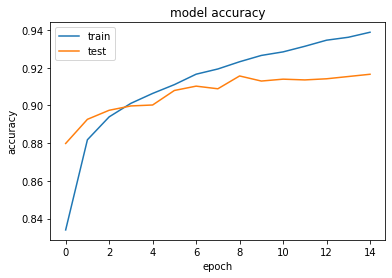

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

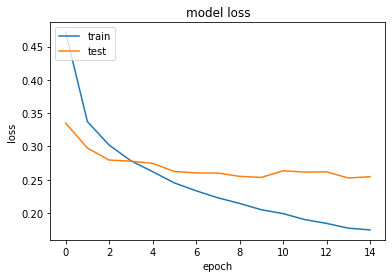

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.4)) #change dropout to 0.4
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4834 - accuracy: 0.8304 - val_loss: 0.3551 - val_accuracy: 0.8713
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3533 - accuracy: 0.8739 - val_loss: 0.2975 - val_accuracy: 0.8936
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3181 - accuracy: 0.8881 - val_loss: 0.2974 - val_accuracy: 0.8945
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2978 - accuracy: 0.8939 - val_loss: 0.2821 - val_accuracy: 0.8948
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2847 - accuracy: 0.8982 - val_loss: 0.2675 - val_accuracy: 0.9046
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2710 - accuracy: 0.9027 - val_loss: 0.2710 - val_accuracy: 0.9043
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2573 - accuracy: 0.9074 - val_loss: 0.2653 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.10999703407288


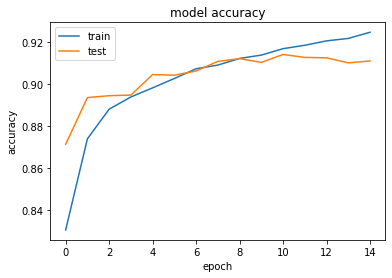

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

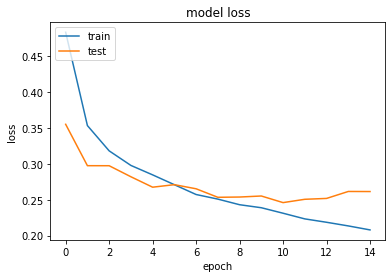

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.6)) #change dropout to 0.6
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5338 - accuracy: 0.8085 - val_loss: 0.3693 - val_accuracy: 0.8694
Epoch 2/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3922 - accuracy: 0.8604 - val_loss: 0.3279 - val_accuracy: 0.8839
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3566 - accuracy: 0.8731 - val_loss: 0.2979 - val_accuracy: 0.8945
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3360 - accuracy: 0.8789 - val_loss: 0.2955 - val_accuracy: 0.8952
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3186 - accuracy: 0.8868 - val_loss: 0.2818 - val_accuracy: 0.8991
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3088 - accuracy: 0.8893 - val_loss: 0.2774 - val_accuracy: 0.8988
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2996 - accuracy: 0.8926 - val_loss: 0.2812 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.01999998092651


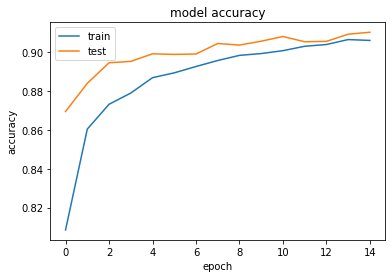

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

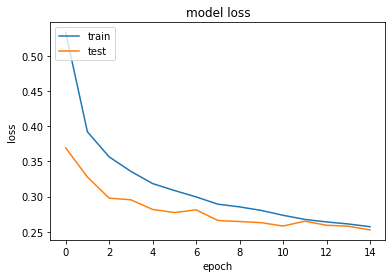

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='selu', input_shape=(28,28,1),kernel_regularizer=l2(0.001))) #Activation fucntion-selu
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='selu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4846 - accuracy: 0.8308 - val_loss: 0.3711 - val_accuracy: 0.8691
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3886 - accuracy: 0.8641 - val_loss: 0.3520 - val_accuracy: 0.8772
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3681 - accuracy: 0.8707 - val_loss: 0.3277 - val_accuracy: 0.8837
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3493 - accuracy: 0.8781 - val_loss: 0.3273 - val_accuracy: 0.8816
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3349 - accuracy: 0.8805 - val_loss: 0.3065 - val_accuracy: 0.8884
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3273 - accuracy: 0.8845 - val_loss: 0.3038 - val_accuracy: 0.8905
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3195 - accuracy: 0.8872 - val_loss: 0.2957 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 90.70000052452087


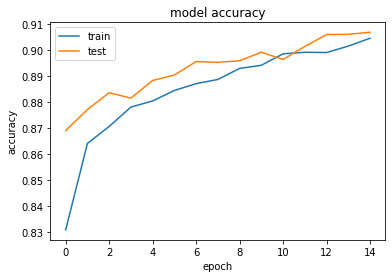

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

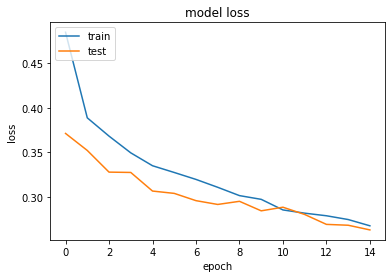

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='tanh', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))#Activation fucntion-tanh
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='tanh',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4735 - accuracy: 0.8327 - val_loss: 0.3593 - val_accuracy: 0.8750
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3738 - accuracy: 0.8670 - val_loss: 0.3337 - val_accuracy: 0.8807
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3415 - accuracy: 0.8787 - val_loss: 0.3024 - val_accuracy: 0.8927
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3256 - accuracy: 0.8838 - val_loss: 0.2964 - val_accuracy: 0.8921
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3096 - accuracy: 0.8892 - val_loss: 0.2916 - val_accuracy: 0.8956
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3007 - accuracy: 0.8915 - val_loss: 0.2820 - val_accuracy: 0.8986
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2920 - accuracy: 0.8941 - val_loss: 0.2980 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 90.38000106811523


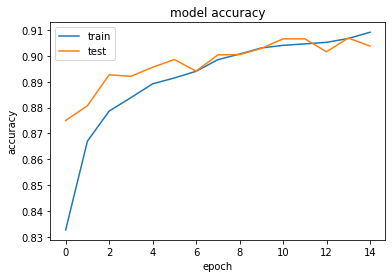

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

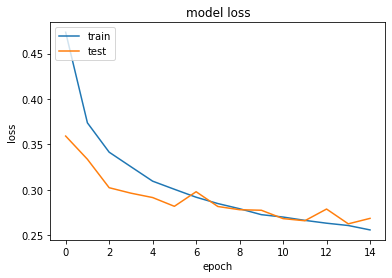

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='gelu', input_shape=(28,28,1),kernel_regularizer=l2(0.001))) #Activation fucntion-gelu
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='gelu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4790 - accuracy: 0.8294 - val_loss: 0.3425 - val_accuracy: 0.8786
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3467 - accuracy: 0.8764 - val_loss: 0.3064 - val_accuracy: 0.8905
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3125 - accuracy: 0.8869 - val_loss: 0.2925 - val_accuracy: 0.8930
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2902 - accuracy: 0.8944 - val_loss: 0.2782 - val_accuracy: 0.8995
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2737 - accuracy: 0.9025 - val_loss: 0.2782 - val_accuracy: 0.9009
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2595 - accuracy: 0.9070 - val_loss: 0.2636 - val_accuracy: 0.9079
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2508 - accuracy: 0.9092 - val_loss: 0.2646 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.32999777793884


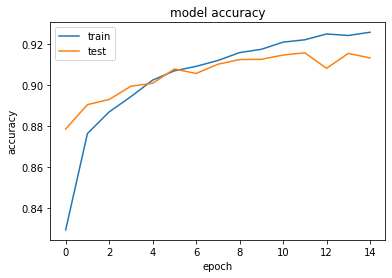

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

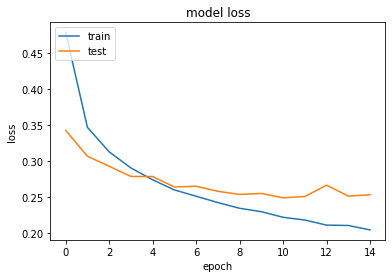

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax',kernel_initializer='HeNormal'))

model.compile(optimizer = 'SGD', loss='sparse_categorical_crossentropy', metrics=["accuracy"]) #optimizers changed to SGD

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.8744 - accuracy: 0.6825 - val_loss: 0.5710 - val_accuracy: 0.7839
Epoch 2/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.6106 - accuracy: 0.7745 - val_loss: 0.5094 - val_accuracy: 0.8150
Epoch 3/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5431 - accuracy: 0.8049 - val_loss: 0.4635 - val_accuracy: 0.8328
Epoch 4/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5036 - accuracy: 0.8192 - val_loss: 0.4354 - val_accuracy: 0.8427
Epoch 5/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4760 - accuracy: 0.8309 - val_loss: 0.4170 - val_accuracy: 0.8525
Epoch 6/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4546 - accuracy: 0.8409 - val_loss: 0.3941 - val_accuracy: 0.8606
Epoch 7/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4386 - accuracy: 0.8459 - val_loss: 0.3859 -

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 88.35999965667725


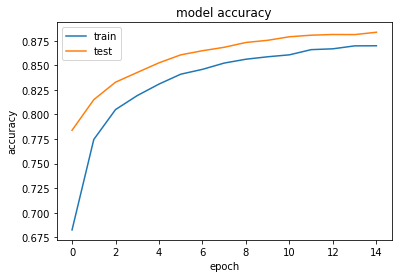

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

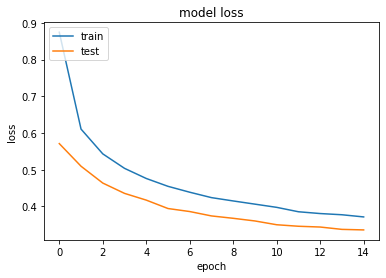

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax',kernel_initializer='HeNormal'))

model.compile(optimizer = 'RMSprop', loss='sparse_categorical_crossentropy', metrics=["accuracy"]) #optimizers changed to RMSprop

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4966 - accuracy: 0.8273 - val_loss: 0.3603 - val_accuracy: 0.8727
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3816 - accuracy: 0.8669 - val_loss: 0.3494 - val_accuracy: 0.8769
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3711 - accuracy: 0.8735 - val_loss: 0.3413 - val_accuracy: 0.8792
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3697 - accuracy: 0.8745 - val_loss: 0.3639 - val_accuracy: 0.8763
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3750 - accuracy: 0.8726 - val_loss: 0.3605 - val_accuracy: 0.8729
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3759 - accuracy: 0.8730 - val_loss: 0.3431 - val_accuracy: 0.8812
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3826 - accuracy: 0.8729 - val_loss: 0.3482 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 87.69999742507935


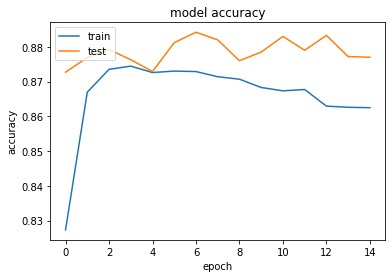

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

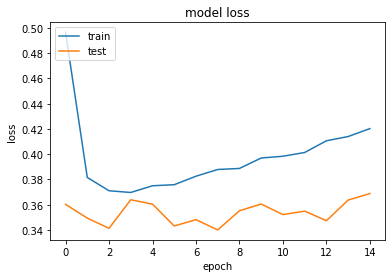

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax',kernel_initializer='HeNormal'))
model.compile(optimizer = 'Adadelta', loss='sparse_categorical_crossentropy', metrics=["accuracy"]) #optimizers changed to Adadelta

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 2.2323 - accuracy: 0.1922 - val_loss: 2.0910 - val_accuracy: 0.4988
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 2.0313 - accuracy: 0.3473 - val_loss: 1.8610 - val_accuracy: 0.5356
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.8247 - accuracy: 0.4313 - val_loss: 1.6340 - val_accuracy: 0.5576
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6371 - accuracy: 0.4738 - val_loss: 1.4488 - val_accuracy: 0.5680
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4904 - accuracy: 0.5046 - val_loss: 1.3100 - val_accuracy: 0.5961
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3815 - accuracy: 0.5296 - val_loss: 1.2048 - val_accuracy: 0.6229
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2932 - accuracy: 0.5496 - val_loss: 1.1227 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 71.66000008583069


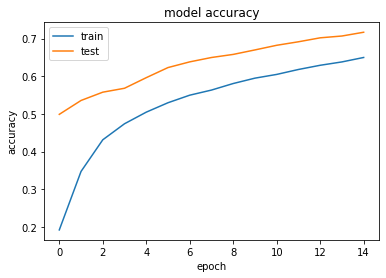

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

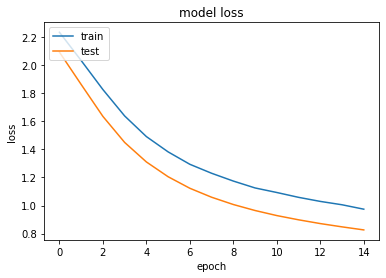

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='GlorotNormal')) #initializers changed to GlorotNormal
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4878 - accuracy: 0.8281 - val_loss: 0.3348 - val_accuracy: 0.8815
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3582 - accuracy: 0.8740 - val_loss: 0.3107 - val_accuracy: 0.8905
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3263 - accuracy: 0.8840 - val_loss: 0.2959 - val_accuracy: 0.8933
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3062 - accuracy: 0.8907 - val_loss: 0.2835 - val_accuracy: 0.8972
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2911 - accuracy: 0.8949 - val_loss: 0.2703 - val_accuracy: 0.9034
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2809 - accuracy: 0.8989 - val_loss: 0.2690 - val_accuracy: 0.9029
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2694 - accuracy: 0.9031 - val_loss: 0.2811 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.22999906539917


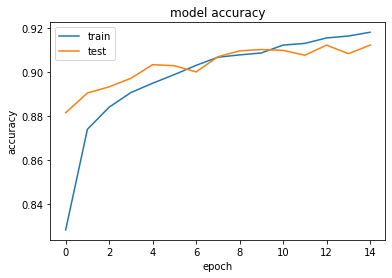

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

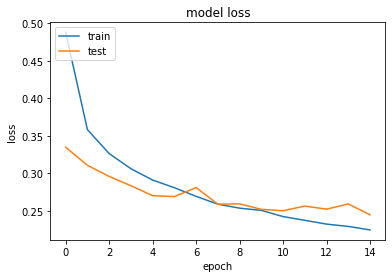

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='GlorotUniform')) #initializers changed to GlorotUniform
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5036 - accuracy: 0.8224 - val_loss: 0.3502 - val_accuracy: 0.8765
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3672 - accuracy: 0.8692 - val_loss: 0.3119 - val_accuracy: 0.8867
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3366 - accuracy: 0.8789 - val_loss: 0.2968 - val_accuracy: 0.8928
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3172 - accuracy: 0.8859 - val_loss: 0.2859 - val_accuracy: 0.8987
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2986 - accuracy: 0.8925 - val_loss: 0.2854 - val_accuracy: 0.8962
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2874 - accuracy: 0.8965 - val_loss: 0.2756 - val_accuracy: 0.9010
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2744 - accuracy: 0.8992 - val_loss: 0.2642 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.14000201225281


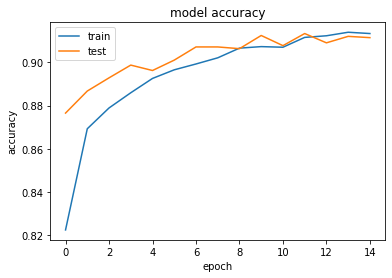

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

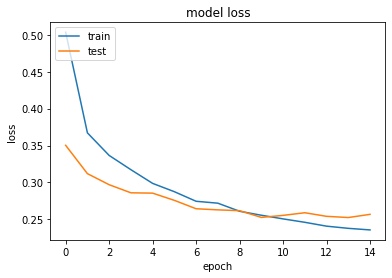

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='RandomNormal')) #initializers changed to RandomNormal
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4906 - accuracy: 0.8258 - val_loss: 0.3412 - val_accuracy: 0.8760
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3577 - accuracy: 0.8720 - val_loss: 0.3033 - val_accuracy: 0.8906
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3226 - accuracy: 0.8835 - val_loss: 0.2895 - val_accuracy: 0.8954
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3024 - accuracy: 0.8918 - val_loss: 0.2761 - val_accuracy: 0.9000
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2881 - accuracy: 0.8964 - val_loss: 0.2629 - val_accuracy: 0.9054
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2772 - accuracy: 0.8986 - val_loss: 0.2625 - val_accuracy: 0.9029
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2661 - accuracy: 0.9039 - val_loss: 0.2570 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.54000282287598


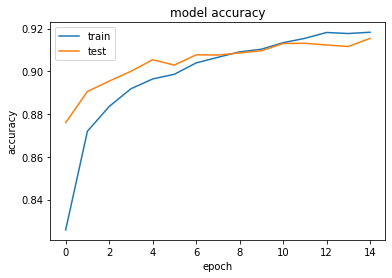

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

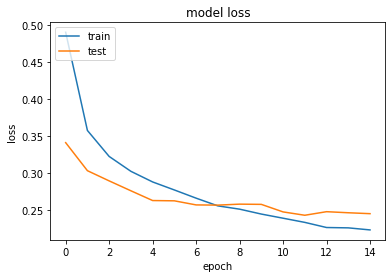

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same")) #padding for convolution 'same' and maxpooling 'same' 
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4903 - accuracy: 0.8274 - val_loss: 0.3623 - val_accuracy: 0.8671
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3598 - accuracy: 0.8725 - val_loss: 0.3112 - val_accuracy: 0.8915
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3263 - accuracy: 0.8843 - val_loss: 0.2937 - val_accuracy: 0.8942
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3082 - accuracy: 0.8891 - val_loss: 0.2788 - val_accuracy: 0.8990
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2900 - accuracy: 0.8949 - val_loss: 0.2755 - val_accuracy: 0.9000
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2775 - accuracy: 0.8992 - val_loss: 0.2658 - val_accuracy: 0.9059
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2677 - accuracy: 0.9037 - val_loss: 0.2681 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.39000177383423


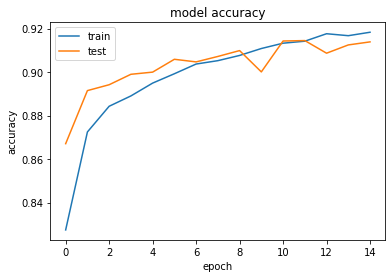

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

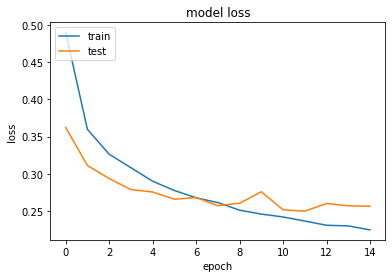

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="valid")) #padding for convolution 'valid' and maxpooling 'valid'
model.add(MaxPooling2D((2, 2),padding="valid"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4843 - accuracy: 0.8296 - val_loss: 0.3339 - val_accuracy: 0.8822
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3548 - accuracy: 0.8742 - val_loss: 0.3160 - val_accuracy: 0.8855
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3262 - accuracy: 0.8835 - val_loss: 0.2953 - val_accuracy: 0.8918
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3033 - accuracy: 0.8922 - val_loss: 0.2857 - val_accuracy: 0.8979
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2889 - accuracy: 0.8966 - val_loss: 0.2727 - val_accuracy: 0.9020
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2795 - accuracy: 0.8998 - val_loss: 0.2704 - val_accuracy: 0.9005
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2710 - accuracy: 0.9025 - val_loss: 0.2656 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.430002450943


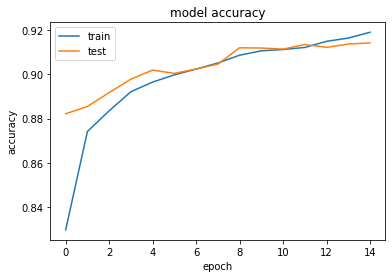

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

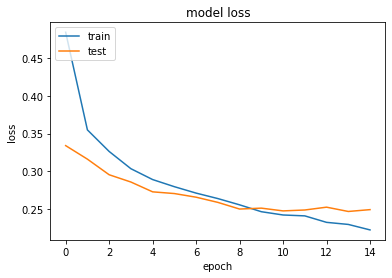

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same")) #padding for convolution 'same' and maxpooling 'valid'
model.add(MaxPooling2D((2, 2),padding="valid"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4687 - accuracy: 0.8351 - val_loss: 0.3495 - val_accuracy: 0.8687
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3467 - accuracy: 0.8755 - val_loss: 0.3011 - val_accuracy: 0.8913
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3163 - accuracy: 0.8870 - val_loss: 0.2951 - val_accuracy: 0.8937
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2976 - accuracy: 0.8933 - val_loss: 0.2935 - val_accuracy: 0.8913
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2837 - accuracy: 0.8964 - val_loss: 0.2752 - val_accuracy: 0.9033
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2726 - accuracy: 0.9016 - val_loss: 0.2650 - val_accuracy: 0.9066
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2630 - accuracy: 0.9046 - val_loss: 0.2718 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.28999710083008


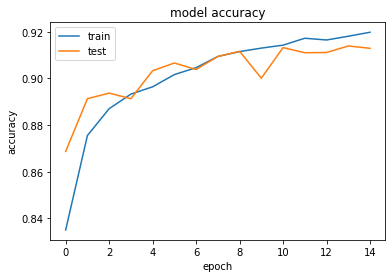

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

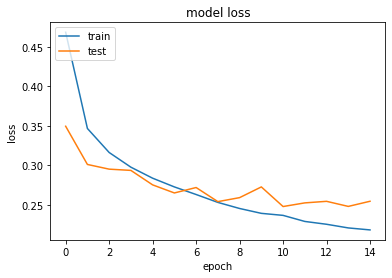

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(1, 1),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same")) #kernel size changed to (1,1)
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6599 - accuracy: 0.7579 - val_loss: 0.4836 - val_accuracy: 0.8161
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5187 - accuracy: 0.8097 - val_loss: 0.4406 - val_accuracy: 0.8399
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4915 - accuracy: 0.8191 - val_loss: 0.4256 - val_accuracy: 0.8395
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4717 - accuracy: 0.8267 - val_loss: 0.4233 - val_accuracy: 0.8443
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4570 - accuracy: 0.8307 - val_loss: 0.4092 - val_accuracy: 0.8473
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4497 - accuracy: 0.8342 - val_loss: 0.4055 - val_accuracy: 0.8508
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4409 - accuracy: 0.8375 - val_loss: 0.3877 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 86.16999983787537


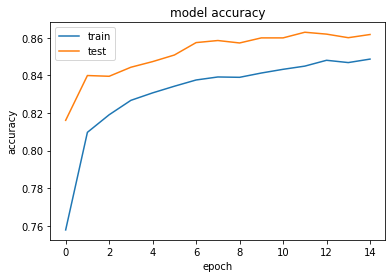

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

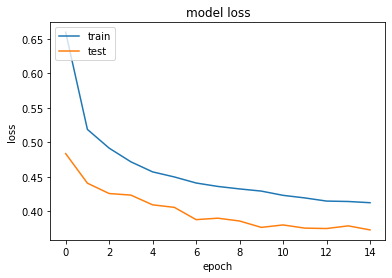

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(2, 2),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same")) #kernel size changed to (2,2)
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4807 - accuracy: 0.8306 - val_loss: 0.3533 - val_accuracy: 0.8721
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3562 - accuracy: 0.8738 - val_loss: 0.3076 - val_accuracy: 0.8876
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3254 - accuracy: 0.8840 - val_loss: 0.2912 - val_accuracy: 0.8961
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3068 - accuracy: 0.8914 - val_loss: 0.2826 - val_accuracy: 0.8973
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2943 - accuracy: 0.8950 - val_loss: 0.2749 - val_accuracy: 0.9016
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2812 - accuracy: 0.8985 - val_loss: 0.2805 - val_accuracy: 0.8997
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2712 - accuracy: 0.9024 - val_loss: 0.2624 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.42000079154968


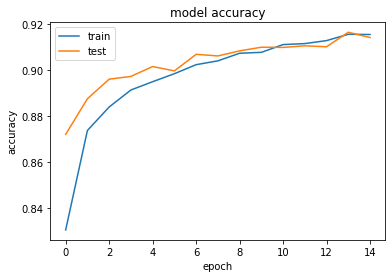

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

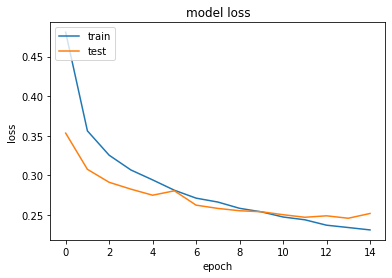

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(4, 4),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same")) #kernel size changed to (4,4)
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4817 - accuracy: 0.8299 - val_loss: 0.3295 - val_accuracy: 0.8795
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3521 - accuracy: 0.8751 - val_loss: 0.3107 - val_accuracy: 0.8856
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3220 - accuracy: 0.8839 - val_loss: 0.2839 - val_accuracy: 0.8964
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3021 - accuracy: 0.8917 - val_loss: 0.2752 - val_accuracy: 0.9015
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2873 - accuracy: 0.8972 - val_loss: 0.2744 - val_accuracy: 0.8991
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2753 - accuracy: 0.9007 - val_loss: 0.2637 - val_accuracy: 0.9046
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2655 - accuracy: 0.9030 - val_loss: 0.2716 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.57000184059143


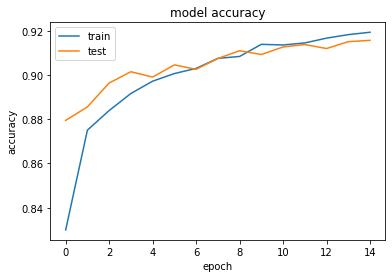

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

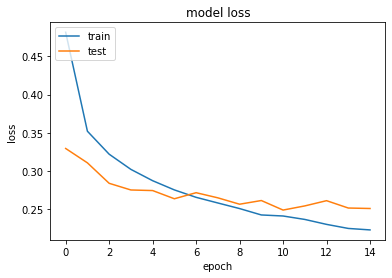

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same"))
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4821 - accuracy: 0.8299 - val_loss: 0.3387 - val_accuracy: 0.8797
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3563 - accuracy: 0.8734 - val_loss: 0.3083 - val_accuracy: 0.8901
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3246 - accuracy: 0.8834 - val_loss: 0.2989 - val_accuracy: 0.8930
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3033 - accuracy: 0.8924 - val_loss: 0.2817 - val_accuracy: 0.8987
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2869 - accuracy: 0.8968 - val_loss: 0.2785 - val_accuracy: 0.8979
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2783 - accuracy: 0.9000 - val_loss: 0.2839 - val_accuracy: 0.9009
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2668 - accuracy: 0.9021 - val_loss: 0.2618 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.39000177383423


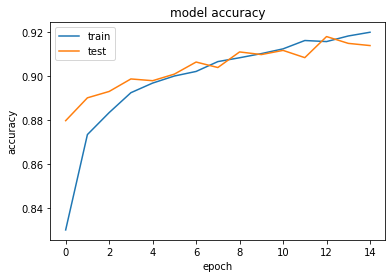

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

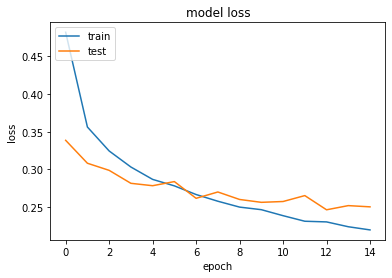

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),padding="same"))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4685 - accuracy: 0.8309 - val_loss: 0.3328 - val_accuracy: 0.8765
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3460 - accuracy: 0.8748 - val_loss: 0.3138 - val_accuracy: 0.8826
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3157 - accuracy: 0.8855 - val_loss: 0.2915 - val_accuracy: 0.8943
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2974 - accuracy: 0.8903 - val_loss: 0.2816 - val_accuracy: 0.8971
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2812 - accuracy: 0.8971 - val_loss: 0.2716 - val_accuracy: 0.8996
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2712 - accuracy: 0.9007 - val_loss: 0.2650 - val_accuracy: 0.9055
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2591 - accuracy: 0.9046 - val_loss: 0.2656 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.35000109672546


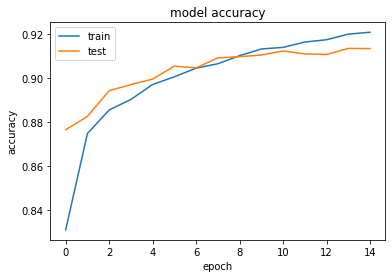

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

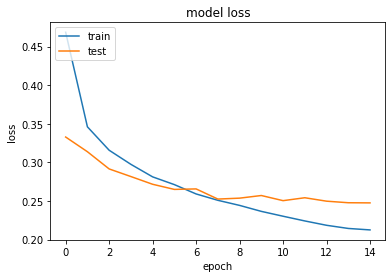

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),padding="same"))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 15s 3ms/step - loss: 0.4573 - accuracy: 0.8377 - val_loss: 0.3261 - val_accuracy: 0.8839
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3153 - accuracy: 0.8869 - val_loss: 0.2810 - val_accuracy: 0.8961
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2751 - accuracy: 0.8988 - val_loss: 0.2672 - val_accuracy: 0.9036
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2513 - accuracy: 0.9081 - val_loss: 0.2561 - val_accuracy: 0.9099
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2290 - accuracy: 0.9159 - val_loss: 0.2549 - val_accuracy: 0.9113
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2133 - accuracy: 0.9209 - val_loss: 0.2502 - val_accuracy: 0.9095
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1955 - accuracy: 0.9272 - val_loss: 0.2421 - val_accuracy

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.75999760627747


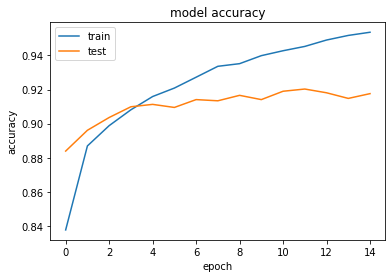

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

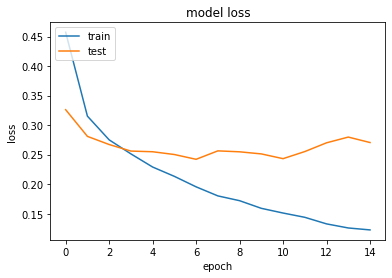

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 6272)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               802944    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                     

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
training_data = np.concatenate((x_train, x_test), axis=0)
testing_data = np.concatenate((y_train, y_test), axis=0)
kfold = KFold(n_splits=2, shuffle=True)
fold_no = 1
for train, test in kfold.split(training_data, testing_data):
  print(model)
  fold_no=fold_no+1
  model = Sequential()
  model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),padding="same"))
  model.add(MaxPooling2D((2, 2),padding="same"))
  model.add(Flatten())
  model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
  history=model.fit(x_train_norm, y_train, epochs=15, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))
  test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4531 - accuracy: 0.8402 - val_loss: 0.3516 - val_accuracy: 0.8694
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3130 - accuracy: 0.8874 - val_loss: 0.2853 - val_accuracy: 0.8935
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2761 - accuracy: 0.8995 - val_loss: 0.2752 - val_accuracy: 0.8974
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2498 - accuracy: 0.9078 - val_loss: 0.2602 - val_accuracy: 0.9020
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2306 - accuracy: 0.9161 - val_loss: 0.2478 - val_accuracy: 0.9061
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2093 - accuracy: 0.9219 - val_loss: 0.2513 - val_accuracy: 0.9105
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1940 - accuracy: 0.9272 - val_loss: 0.2422 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 92.11000204086304


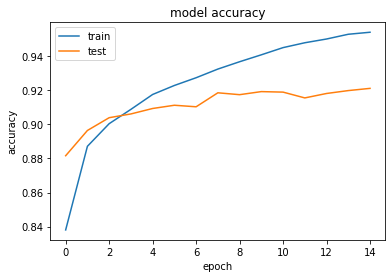

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

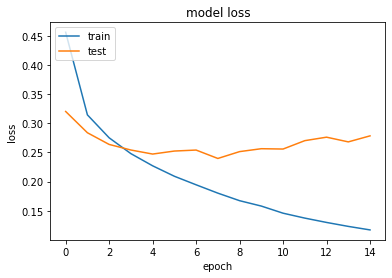

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

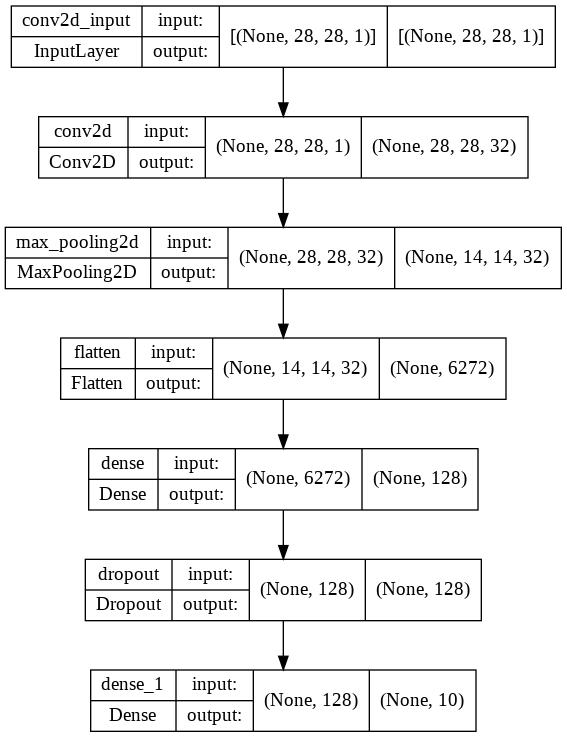

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

X=(60000, 28, 28), y=(60000,)
X=(10000, 28, 28), y=(10000,)


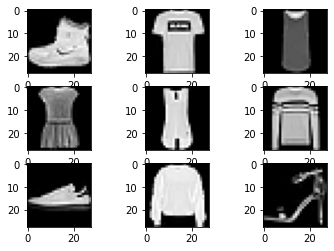

In [ ]:
import tensorflow as tf
tf.keras.layers.Resizing
print('X=%s, y=%s' % (x_train_norm.shape, y_train.shape))
print('X=%s, y=%s' % (x_test_norm.shape, y_test.shape))
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train_norm[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# **Data Augmentation**
>


In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

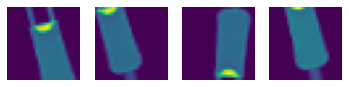

In [ ]:
#We are taking one image and trying to rotate it 30 degrees and trying to print four outputs of the image
data_augmentor = ImageDataGenerator(rotation_range=30, horizontal_flip=True, vertical_flip=True,width_shift_range=0.2, height_shift_range=0.2,brightness_range=[0.5,0.5])
data_augmentor.fit(X_train)
augment = data_augmentor.flow(X_train[2:3], batch_size=1)
for i in range(1, 5):
  plt.subplot(1,4,i)
  plt.imshow(augment.next().squeeze())
  plt.axis('off')
plt.show()

In [ ]:
#We have taken the whole dataset and rotated each image 45 degrees
data_augmentor = ImageDataGenerator(rotation_range=45, horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2,brightness_range=[0.5,0.5])

data_augmentor.fit(X_train)

augment = data_augmentor.flow(X_train[:], batch_size=1)
count_train=0
count_test=0
total_dataset_1=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_1=count_train+count_test
print(total_dataset_1,'images have been rotated to 45 degrees, keeping all other parameters constant')

70000 images have been rotated to 45 degrees, keeping all other parameters constant


In [ ]:
#We have taken the whole dataset and rotated each image 90 degrees
data_augmentor = ImageDataGenerator(rotation_range=90, horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2,brightness_range=[0.5,0.5])

data_augmentor.fit(X_train)

augment = data_augmentor.flow(X_train[:], batch_size=1)
count_train=0
count_test=0
total_dataset_2=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_2=count_train+count_test
print(total_dataset_2,'images have been rotated to 90 degrees, keeping all other parameters constant')

70000 images have been rotated to 90 degrees, keeping all other parameters constant


In [ ]:
#We have taken the whole dataset and rotated each image 120 degrees
data_augmentor = ImageDataGenerator(rotation_range=120, horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2,brightness_range=[0.5,0.5])

data_augmentor.fit(X_train)

augment = data_augmentor.flow(X_train[:], batch_size=1)
count_train=0
count_test=0
total_dataset_3=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_3=count_train+count_test
print(total_dataset_3,'images have been rotated to 120 degrees, keeping all other parameters constant')

70000 images have been rotated to 120 degrees, keeping all other parameters constant


In [ ]:
#We have taken the whole dataset and rotated each image 270 degrees
data_augmentor = ImageDataGenerator(rotation_range=270, horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2,brightness_range=[0.5,0.5])

data_augmentor.fit(X_train)

augment = data_augmentor.flow(X_train[:], batch_size=1)
count_train=0
count_test=0
total_dataset_4=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_4=count_train+count_test
print(total_dataset_4,'images have been rotated to 270 degrees, keeping all other parameters constant')

70000 images have been rotated to 270 degrees, keeping all other parameters constant


In [ ]:
Final_increased_dataset=0
Final_increased_dataset=total_dataset_1+total_dataset_2+total_dataset_3+total_dataset_4
print(Final_increased_dataset)

280000


# ** Part III Visualization Graphs**

[9, 0, 3, 2, 7, 5, 1, 6, 4, 8]
[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


Text(0, 0.5, 'Types (Count)')

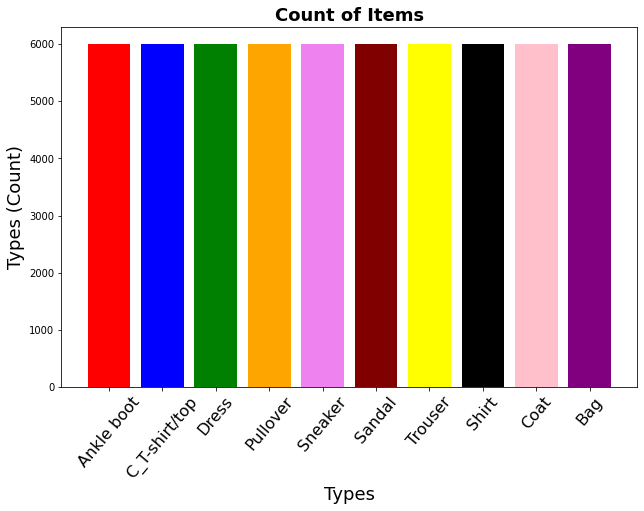

In [ ]:
pe=[]
re=[]
region=y_train.tolist()
for i in region:
  if i not in re:
    re.append(i)
total=Counter(region)
obj_values=total.values()
for i in obj_values:
  pe.append(i)


print(re)
print(pe)

langs = ['Ankle boot', 'C_T-shirt/top', 'Dress', 'Pullover', 'Sneaker','Sandal','Trouser','Shirt','Coat','Bag']
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0,0,1,1])

ax.bar(langs,pe)

ax.set_xticklabels(langs, rotation=50, fontsize=16)
#ax.set_yticklabels(fontsize=16,weight='bold')
ax.bar(langs,pe, color=['red', 'blue', 'green', 'orange', 'violet','maroon','yellow','black','pink','purple'])


plt.title('Count of Items',weight="bold", fontsize=18)
plt.xlabel("Types", fontsize=18)
plt.ylabel("Types (Count)",fontsize=18)


313/313 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.9012


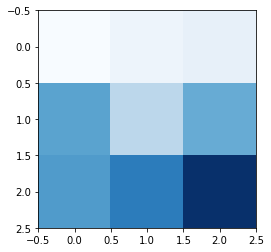

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='RandomNormal')) #initializers changed to RandomNormal
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=5, batch_size=32, verbose=0, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)
top_layer = model.layers[0]
plt.imshow(top_layer.get_weights()[0][:,:,:,0].squeeze(), cmap='Blues')

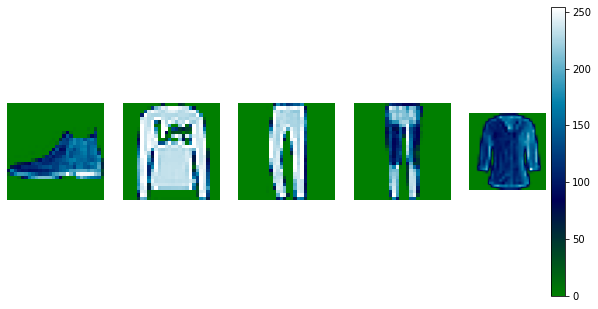

LABELS [9 2 1 1 6]


In [ ]:
plt.figure(figsize=(10,10))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i],cmap='ocean')
    plt.axis('off')
plt.colorbar()
plt.show()

print('LABELS %s' % (y_test[0:5]))